<h1><center> Assignment 1: Analyzing Dataset </center></h1>

#### Submitted by: Ali Milhem
#### Submission Date: February 06/2019
#### Dataset: 2015 Central Line-Associated Bloodstream Infections (CLABSI) Table
#### Link to the Dataset: https://healthdata.gov/dataset/2015-central-line-associated-bloodstream-infections-clabsi-table

        

                                                                      
<h2><center> Reading The Datafile </center></h2> 
I used Panda API to read the csv files shown in the below code: 


In [1]:
import sys
!{sys.executable} -m pip install sodapy
import os
from sodapy import Socrata
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
plt.close('all')
import pandas as pd
import simplejson as json



In [2]:

client = Socrata("data.oregon.gov", app_token=None)# , os.environ['SOCRATA_TOKEN'])


 Comnnect to data server of Oregon Gov using Socrata  

In [6]:
datasets = ["4arj-uxbw"]
jsons = client.get(datasets[0])
print(jsons)

[{'percentile_on_2014_national_sir_distribution': '51-55%', 'observed_infections': '118', 'benchmark_icon': '56365940-1f34-49fd-aba4-7dc84bfe3b1e', 'central_line_days': '161715', 'sir_interpretation_2006_08_us_baseline': 'Statistically fewer infections', 'hospital_location': 'All Adult/Ped ICUs & M/S/MS Wards Combined*', 'sir_icon': '3732ece8-bc6f-4daf-a3eb-7951da203abc', '_2013_hhs_targets': 'SIR Target (<0.5) Met', 'predicted_infections': '271.59', '_2015_sir': '0.434', 'sir_95_ci': '0.361, 0.518', 'hospital_name': ' 1. All Oregon'}, {'percentile_on_2014_national_sir_distribution': '71-75%', 'observed_infections': '12', 'central_line_days': '7622', 'sir_interpretation_2006_08_us_baseline': 'Fewer infections', 'hospital_location': 'All Neonatal ICUs Combined*', 'sir_icon': 'e0e40dd5-b42e-4307-9694-036e3de5e97b', '_2013_hhs_targets': 'Target Not Met', 'predicted_infections': '16.04', '_2015_sir': '0.748', 'sir_95_ci': '0.405, 1.272', 'hospital_name': ' 1. All Oregon'}, {'percentile_on_

Pull the dataset, print 3 records - identify the fromat!
The fromat is what DataFrame can read as records: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.from_records.html

In [7]:
clabsi= pd.DataFrame.from_records(jsons, coerce_float=True)
#clabsi= pd.read_json(jsons)
clabsi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 15 columns):
_2013_hhs_targets                               196 non-null object
_2015_sir                                       219 non-null object
benchmark_icon                                  149 non-null object
central_line_days                               219 non-null object
county                                          203 non-null object
hospital_location                               219 non-null object
hospital_name                                   219 non-null object
hpp_region                                      203 non-null object
location_1                                      203 non-null object
observed_infections                             219 non-null object
percentile_on_2014_national_sir_distribution    218 non-null object
predicted_infections                            219 non-null object
sir_95_ci                                       217 non-null object
sir_icon   

The column names have underscores in names and lowercased already compared to the csv, but type is Object, and need conversion to int

In [8]:
clabsi.drop(["_2013_hhs_targets","county", "sir_icon", "benchmark_icon","location_1"], axis=1, inplace=True)
clabsi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 10 columns):
_2015_sir                                       219 non-null object
central_line_days                               219 non-null object
hospital_location                               219 non-null object
hospital_name                                   219 non-null object
hpp_region                                      203 non-null object
observed_infections                             219 non-null object
percentile_on_2014_national_sir_distribution    218 non-null object
predicted_infections                            219 non-null object
sir_95_ci                                       217 non-null object
sir_interpretation_2006_08_us_baseline          219 non-null object
dtypes: object(10)
memory usage: 17.2+ KB


In [9]:
clabsi

,_2015_sir,central_line_days,hospital_location,hospital_name,hpp_region,observed_infections,percentile_on_2014_national_sir_distribution,predicted_infections,sir_95_ci,sir_interpretation_2006_08_us_baseline
0,0.434,161715,All Adult/Ped ICUs & M/S/MS Wards Combined*,1. All Oregon,NaN,118,51-55%,271.59,"0.361, 0.518",Statistically fewer infections
1,0.748,7622,All Neonatal ICUs Combined*,1. All Oregon,NaN,12,71-75%,16.04,"0.405, 1.272",Fewer infections
2,0.501,3996,Adult Cardiac ICUs,1. All Oregon,NaN,4,61-65%,7.99,"0.159, 1.207",Fewer infections
3,0.422,8466,Adult Cardiothoracic ICUs,1. All Oregon,NaN,5,56-60%,11.85,"0.155, 0.935",Statistically fewer infections
4,0.361,4850,Adult Medical ICUs,1. All Oregon,NaN,4,51-55%,11.08,"0.115, 0.871",Statistically fewer infections
5,0.341,45068,Adult Medical/Surgical ICUs,1. All Oregon,NaN,26,46-50%,76.28,"0.227, 0.492",Statistically fewer infections
6,0.376,4431,Pediatric Medical/Surgical ICUs,1. All Oregon,NaN,5,51-55%,13.29,"0.138, 0.834",Statistically fewer infections
7,0.283,2831,Adult Neurosurgical ICUs,1. All Oregon,NaN,2,41-45%,7.08,"0.047, 0.934",Statistically fewer infections
8,0.305,1310,NICU Level III,1. All Oregon,NaN,1,41-45%,3.28,"0.015, 1.502",Fewer infections
9,0.265,6573,Adult Surgical ICUs,1. All Oregon,NaN,4,41-45%,15.12,"0.084, 0.638",Statistically fewer infections


,_2013_hhs_targets,_2015_sir,benchmark_icon,central_line_days,county,hospital_location,hospital_name,hpp_region,location_1,observed_infections,percentile_on_2014_national_sir_distribution,predicted_infections,sir_95_ci,sir_icon,sir_interpretation_2006_08_us_baseline
214,ZERO Infections,*,b85c0dc9-8bed-4d1d-bac7-d5029fbb091c,116,WALLOWA,All Adult/Ped ICUs & M/S/MS Wards Combined*,Wallowa Memorial Hospital,Region9,"{'latitude': '45.4323835', 'human_address': '{...",0,*,0.14,*,NaN,#s too small to calculate
215,ZERO Infections,*,325ed3c6-6546-4b69-99e4-f8bc73f3967b,116,WALLOWA,Adult Medical/Surgical Wards,Wallowa Memorial Hospital,Region9,"{'latitude': '45.4323835', 'human_address': '{...",0,*,0.14,*,NaN,#s too small to calculate
216,SIR Target (<0.5) Met & ZERO Infections,0,e5d05e71-3ec7-482b-ab70-edc1f3d24a53,1553,YAMHILL,All Adult/Ped ICUs & M/S/MS Wards Combined*,Willamette Valley Medical Center,Region2,"{'latitude': '45.1990006', 'human_address': '{...",0,0-20%,2.41,", 1.242",2c9c26d6-0816-4084-97ef-00e340ed8b16,Fewer infections
217,SIR Target (<0.5) Met & ZERO Infections,0,e33a9635-0ec5-4511-99fe-6f0d3d237cce,609,YAMHILL,Adult Medical/Surgical ICUs,Willamette Valley Medical Center,Region2,"{'latitude': '45.1990006', 'human_address': '{...",0,0-25%,1.28,", 2.342",e3ac68ee-7586-463f-92cb-ebd3d63f8936,Fewer infections
218,SIR Target (<0.5) Met & ZERO Infections,0,e11f7992-a374-4410-8f80-f2454422925a,944,YAMHILL,Adult Medical/Surgical Wards,Willamette Valley Medical Center,Region2,"{'latitude': '45.1990006', 'human_address': '{...",0,0-20%,1.13,", 2.645",4cd272c4-38ac-4b75-abb2-9eb9deb321a7,Fewer infections


## old

Original starts bellow

In [13]:
import pandas as pd


clabsi = pd.read_csv("Datasets/2015_Central_Line-Associated_Bloodstream_Infections__CLABSI__Table.csv")

clabsi.drop(["County", "SIR Icon", "Benchmark Icon", "Location 1"], axis=1, inplace=True)
clabsi


,Hospital Name,Hospital Location,Central Line Days,Observed Infections,Predicted Infections,2015 SIR,SIR 95% CI,SIR Interpretation (2006-08 US baseline),2013 HHS Targets,Percentile on 2014 National SIR Distribution,HPP Region
0,1. All Oregon,All Neonatal ICUs Combined*,7622,12,16.04,0.748,"0.405, 1.272",Fewer infections,Target Not Met,71-75%,NaN
1,1. All Oregon,Pediatric Medical/Surgical ICUs,4431,5,13.29,0.376,"0.138, 0.834",Statistically fewer infections,SIR Target (<0.5) Met,51-55%,NaN
2,1. All Oregon,Adult Medical/Surgical ICUs,45068,26,76.28,0.341,"0.227, 0.492",Statistically fewer infections,SIR Target (<0.5) Met,46-50%,NaN
3,1. All Oregon,Adult Medical ICUs,4850,4,11.08,0.361,"0.115, 0.871",Statistically fewer infections,SIR Target (<0.5) Met,51-55%,NaN
4,1. All Oregon,Adult Cardiothoracic ICUs,8466,5,11.85,0.422,"0.155, 0.935",Statistically fewer infections,SIR Target (<0.5) Met,56-60%,NaN
5,Asante Rogue Regional Medical Center,All Neonatal ICUs Combined*,309,1,0.64,*,*,#s too small to calculate,NaN,*,Region5
6,Asante Rogue Regional Medical Center,NICU Level II/III,309,1,0.64,*,*,#s too small to calculate,NaN,*,Region5
7,Ashland Community Hospital,All Adult/Ped ICUs & M/S/MS Wards Combined*,230,1,0.29,*,*,#s too small to calculate,NaN,*,Region5
8,Ashland Community Hospital,Adult Medical/Surgical Wards,187,1,0.22,*,*,#s too small to calculate,NaN,*,Region5
9,Bay Area Hospital,Adult Surgical Wards,675,1,0.95,*,*,#s too small to calculate,NaN,*,Region3


In [14]:
clabsi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 11 columns):
Hospital Name                                   219 non-null object
Hospital Location                               219 non-null object
Central Line Days                               219 non-null int64
Observed Infections                             219 non-null int64
Predicted Infections                            219 non-null float64
2015 SIR                                        219 non-null object
SIR 95% CI                                      217 non-null object
SIR Interpretation (2006-08 US baseline)        219 non-null object
2013 HHS Targets                                196 non-null object
Percentile on 2014 National SIR Distribution    218 non-null object
HPP Region                                      203 non-null object
dtypes: float64(1), int64(2), object(8)
memory usage: 18.9+ KB


 <h2><center> Data Cleaning </center></h2>
                                                                           

1. I dropped the columns that I do not need in this analysis.


In [15]:
clabsi.drop(["County", "SIR Icon", "Benchmark Icon"], axis=1, inplace=True)

KeyError: "['County' 'SIR Icon' 'Benchmark Icon'] not found in axis"

In [43]:
clabsi.head(2)

,Hospital Name,Hospital Location,Central Line Days,Observed Infections,Predicted Infections,2015 SIR,SIR 95% CI,SIR Interpretation (2006-08 US baseline),2013 HHS Targets,Percentile on 2014 National SIR Distribution,HPP Region,Location 1
0,1. All Oregon,All Neonatal ICUs Combined*,7622,12,16.04,0.748,"0.405, 1.272",Fewer infections,Target Not Met,71-75%,NaN,NaN
1,1. All Oregon,Pediatric Medical/Surgical ICUs,4431,5,13.29,0.376,"0.138, 0.834",Statistically fewer infections,SIR Target (<0.5) Met,51-55%,NaN,NaN


In [44]:
clabsi.rename(columns={"2015 SIR":"2015 Standard_Infection_Ratio,SIR"}, inplace=True)
clabsi.head()

,Hospital Name,Hospital Location,Central Line Days,Observed Infections,Predicted Infections,"2015 Standard_Infection_Ratio,SIR",SIR 95% CI,SIR Interpretation (2006-08 US baseline),2013 HHS Targets,Percentile on 2014 National SIR Distribution,HPP Region,Location 1
0,1. All Oregon,All Neonatal ICUs Combined*,7622,12,16.04,0.748,"0.405, 1.272",Fewer infections,Target Not Met,71-75%,NaN,NaN
1,1. All Oregon,Pediatric Medical/Surgical ICUs,4431,5,13.29,0.376,"0.138, 0.834",Statistically fewer infections,SIR Target (<0.5) Met,51-55%,NaN,NaN
2,1. All Oregon,Adult Medical/Surgical ICUs,45068,26,76.28,0.341,"0.227, 0.492",Statistically fewer infections,SIR Target (<0.5) Met,46-50%,NaN,NaN
3,1. All Oregon,Adult Medical ICUs,4850,4,11.08,0.361,"0.115, 0.871",Statistically fewer infections,SIR Target (<0.5) Met,51-55%,NaN,NaN
4,1. All Oregon,Adult Cardiothoracic ICUs,8466,5,11.85,0.422,"0.155, 0.935",Statistically fewer infections,SIR Target (<0.5) Met,56-60%,NaN,NaN


In [45]:
clabsi.columns = clabsi.columns.str.replace(' ', '_')
clabsi.head(2)

,Hospital_Name,Hospital_Location,Central_Line_Days,Observed_Infections,Predicted_Infections,"2015_Standard_Infection_Ratio,SIR",SIR_95%_CI,SIR_Interpretation_(2006-08_US_baseline),2013_HHS_Targets,Percentile_on_2014_National_SIR_Distribution,HPP_Region,Location_1
0,1. All Oregon,All Neonatal ICUs Combined*,7622,12,16.04,0.748,"0.405, 1.272",Fewer infections,Target Not Met,71-75%,NaN,NaN
1,1. All Oregon,Pediatric Medical/Surgical ICUs,4431,5,13.29,0.376,"0.138, 0.834",Statistically fewer infections,SIR Target (<0.5) Met,51-55%,NaN,NaN


<h2><center> Summary and Type of Data </center></h2>
                                                                        
The code below shows a summary of the dataset, as well as the size and typr=e of data.

In [10]:
clabsi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 10 columns):
_2015_sir                                       219 non-null object
central_line_days                               219 non-null object
hospital_location                               219 non-null object
hospital_name                                   219 non-null object
hpp_region                                      203 non-null object
observed_infections                             219 non-null object
percentile_on_2014_national_sir_distribution    218 non-null object
predicted_infections                            219 non-null object
sir_95_ci                                       217 non-null object
sir_interpretation_2006_08_us_baseline          219 non-null object
dtypes: object(10)
memory usage: 17.2+ KB


<h2><center> Summary of Statistical Informatiion </center></h2>

In [47]:
clabsi.describe()

,Central_Line_Days,Observed_Infections,Predicted_Infections
count,219.000000,219.000000,219.000000
mean,3109.570776,2.383562,5.277443
std,11924.243042,8.774907,20.080048
min,0.000000,0.000000,0.000000
25%,198.000000,0.000000,0.275000
50%,939.000000,1.000000,1.310000
75%,2300.000000,2.000000,3.810000
max,161715.000000,118.000000,271.590000


                                                                       
 <h2><center> Data Visualization </center></h2>



In [48]:
import  seaborn as sns

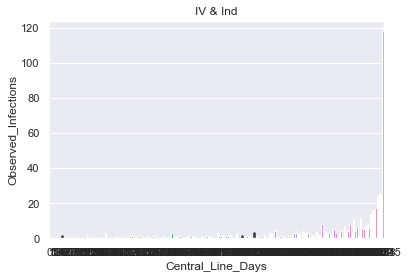

In [49]:
dv = sns.barplot("Central_Line_Days", "Observed_Infections", data=clabsi).set_title("IV & Ind")

The bar chart above shows a positive relationship beteween the days of central line, and the observed infections.


Text(0, 0.5, 'number of observations')

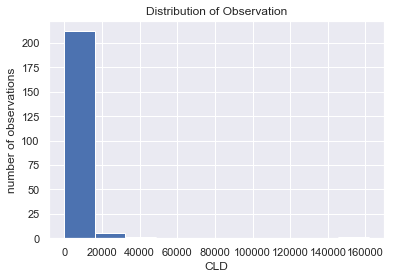

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(clabsi.Central_Line_Days)
plt.title("Distribution of Observation")
plt.xlabel("CLD")
plt.ylabel("number of observations")

This histogram charts shows that most of the cases has central line days (CLD) of less than 20000  

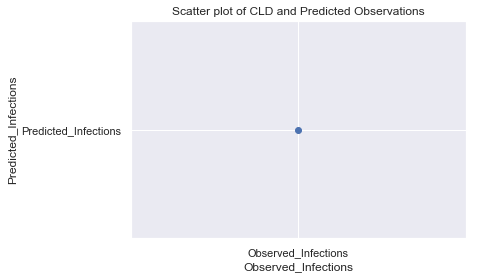

In [51]:
plt.title('Scatter plot of CLD and Predicted Observations')
plt.xlabel("Observed_Infections")
plt.ylabel("Predicted_Infections")
plt.scatter("Observed_Infections", "Predicted_Infections")
plt.show()

Igor's changesstart here

In [56]:
clabsi.columns
numeric_vals = clabsi.filter(regex='(Central_Line_Days,Observed_Infections, Predicted_Infections)', axis= 'columns')
numeric_vals
#less_freq= less_freq_.groupby(level='mmwr_week').sum() # 'reporting_area','mmwr_year'
#sns.pairplot(less_freq, height=5);
#ds = clabsi.loc['Central_Line_Days',
#       'Observed_Infections', 'Predicted_Infections']

""
0
1
2
3
4
5
6
7
8
9
